In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)

In [504]:
df = pd.read_csv('./data/traffic.csv')

### 1. General Trends

#### 
What are the overall trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010-2021?


In [ ]:
import matplotlib.dates as mdates


def plot_time_serie(x, s, title="", xlabel='Date', ylabel='Number of traffic accidens', dpi=100):
    
    plt.figure(figsize=(40,4), dpi=dpi)
    plt.plot(x, s, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

date = pd.to_datetime(df['Date '], format='%d/%m/%Y')
s = date.value_counts().sort_index()

plot_time_serie(x=date, s=s, title='Trend analysis')

In [12]:
date = pd.to_datetime(df['Date '], format='%d/%m/%Y')
s = date.value_counts().sort_index()
s

2010-01-01     4
2010-01-02     7
2010-01-03     6
2010-01-04     6
2010-01-05     1
              ..
2021-12-27    11
2021-12-28     4
2021-12-29     5
2021-12-30     1
2021-12-31     2
Name: Date , Length: 4308, dtype: int64

In [ ]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

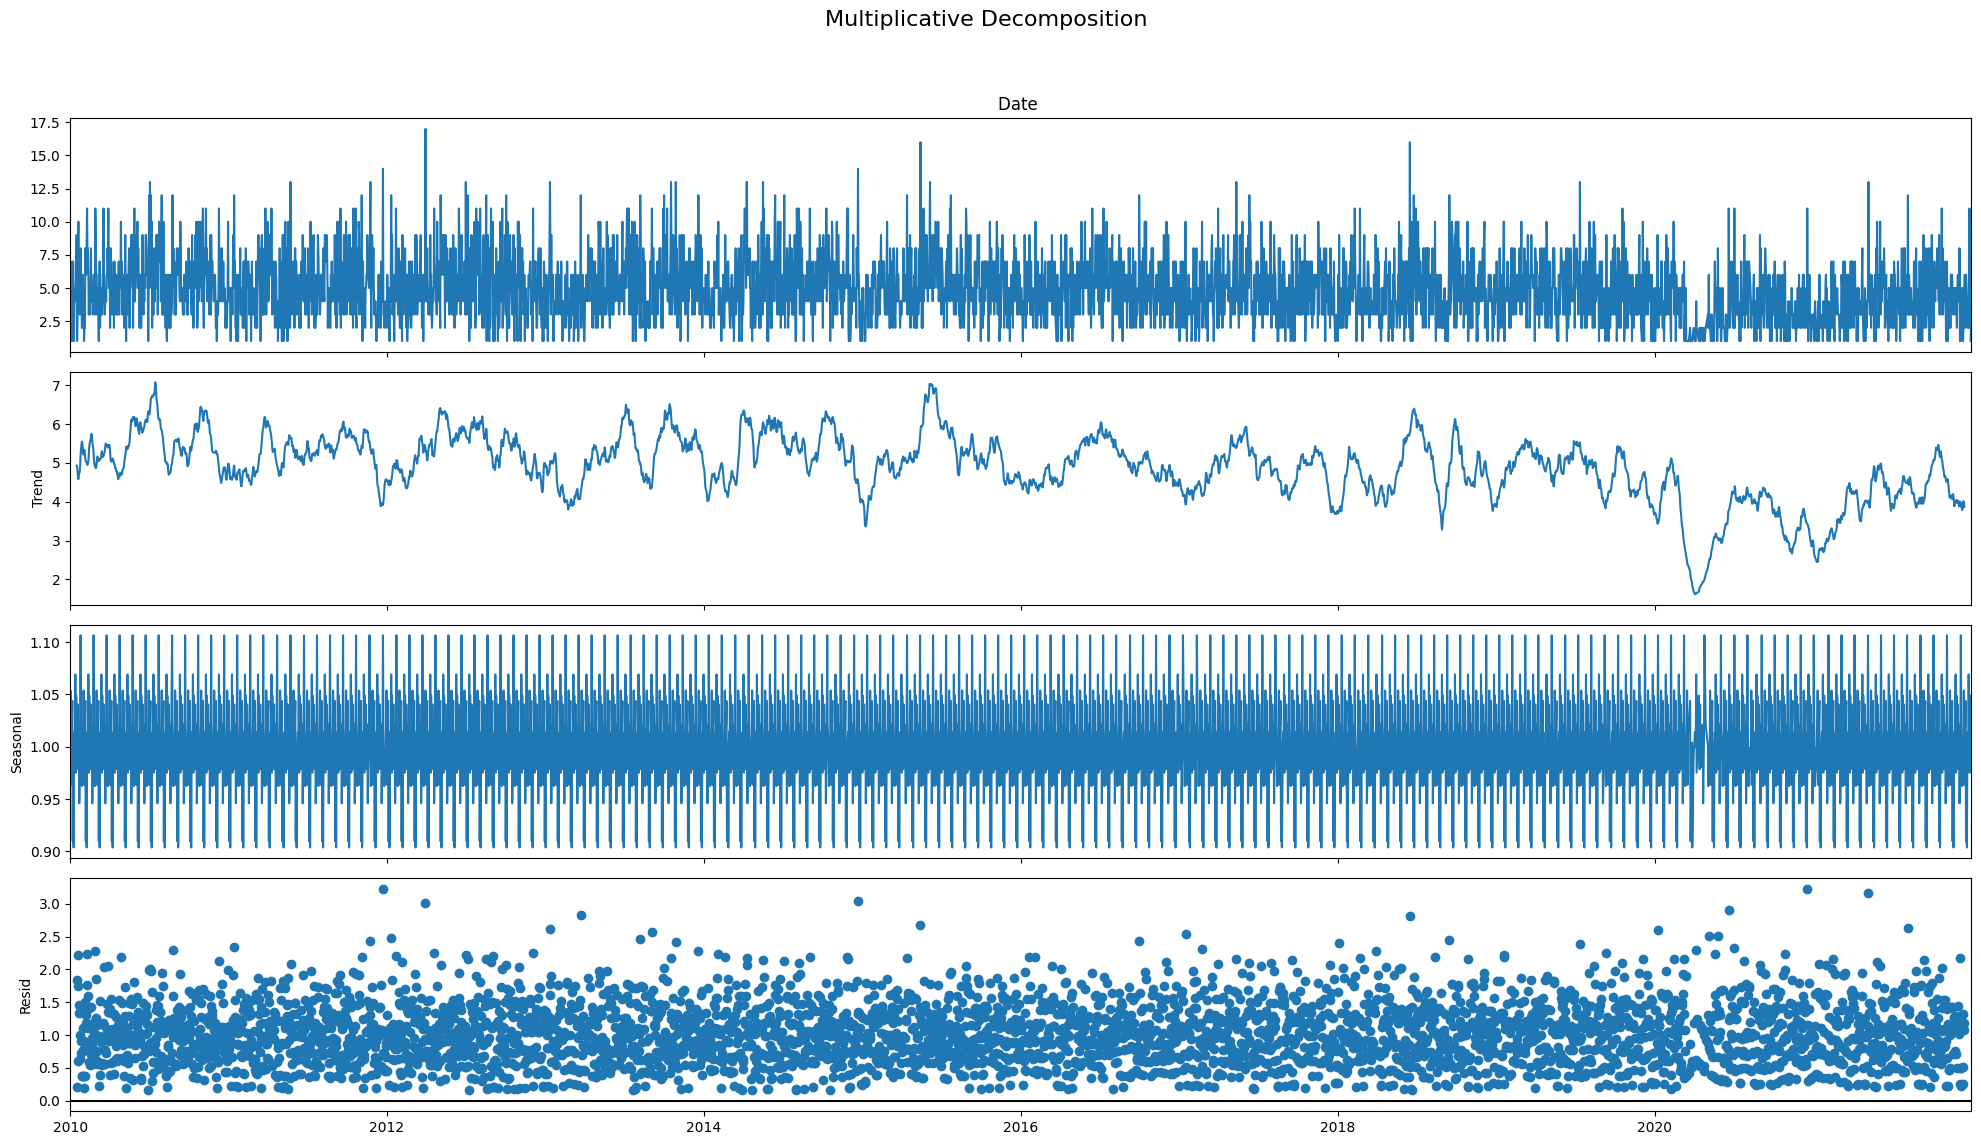

In [17]:
multiplicative_decomposition = seasonal_decompose(s, model='multiplicative', period=30)
plt.rcParams.update({'figure.figsize': (20,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

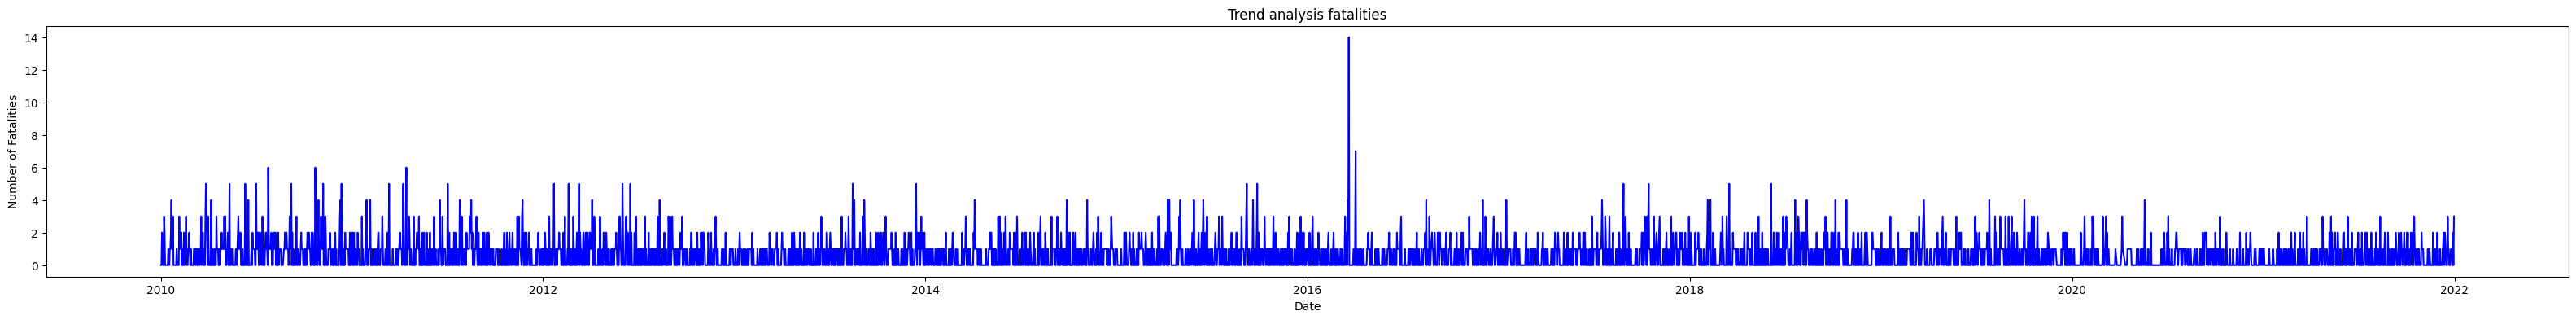

In [52]:
fatalities_by_day = df[['Date ', 'Fatalties']].groupby('Date ', as_index=False).sum()
fatalities_by_day['Date '] = pd.to_datetime(fatalities_by_day['Date '], format='%d/%m/%Y')
fatalities_by_day = fatalities_by_day.sort_values(by='Date ')

plot_time_serie(x=fatalities_by_day['Date '], s=fatalities_by_day['Fatalties'], ylabel='Number of Fatalities', title='Trend analysis fatalities')



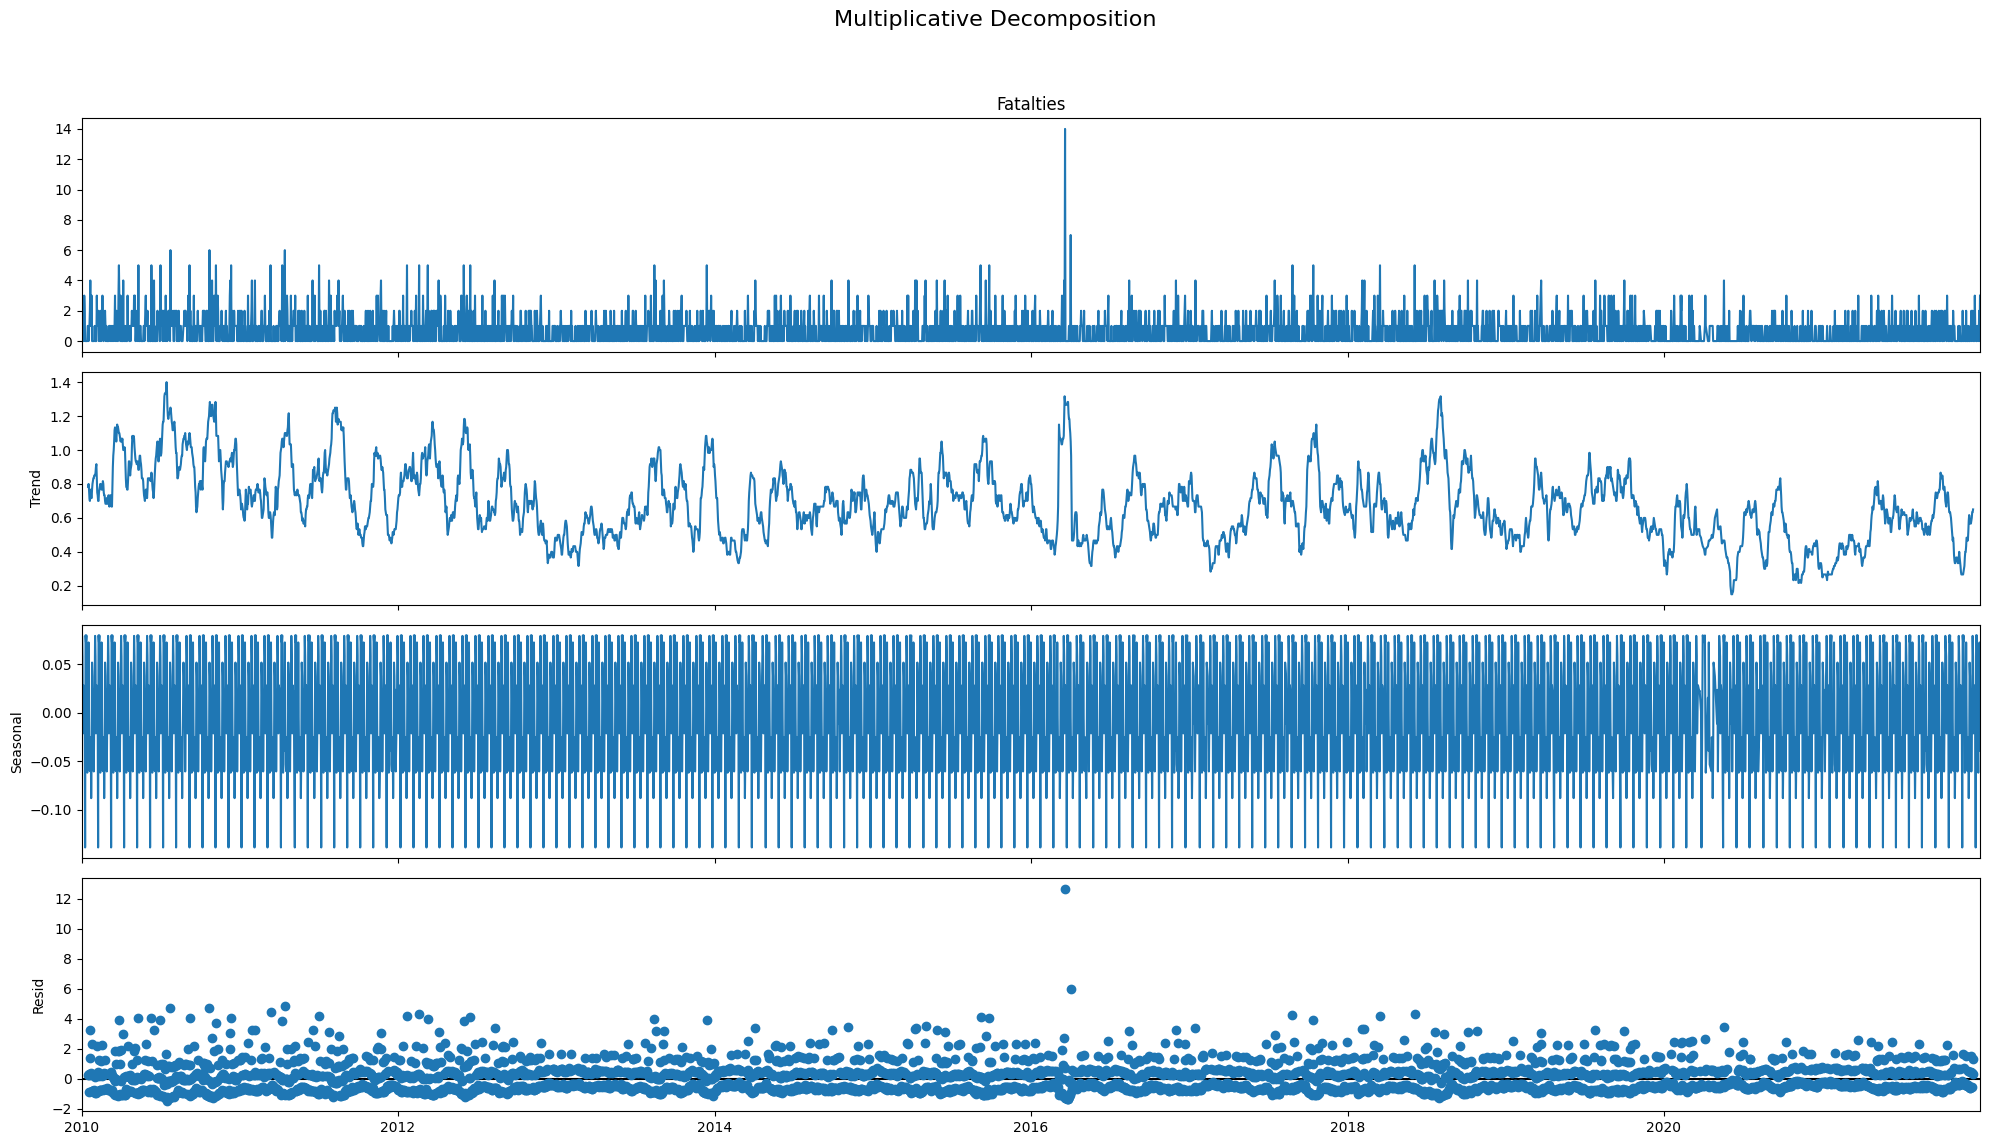

In [72]:
addictive_decomposition = seasonal_decompose(fatalities_by_day.set_index('Date ')['Fatalties'], model='addictive', period=30)

plt.rcParams.update({'figure.figsize': (20,12)})
addictive_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

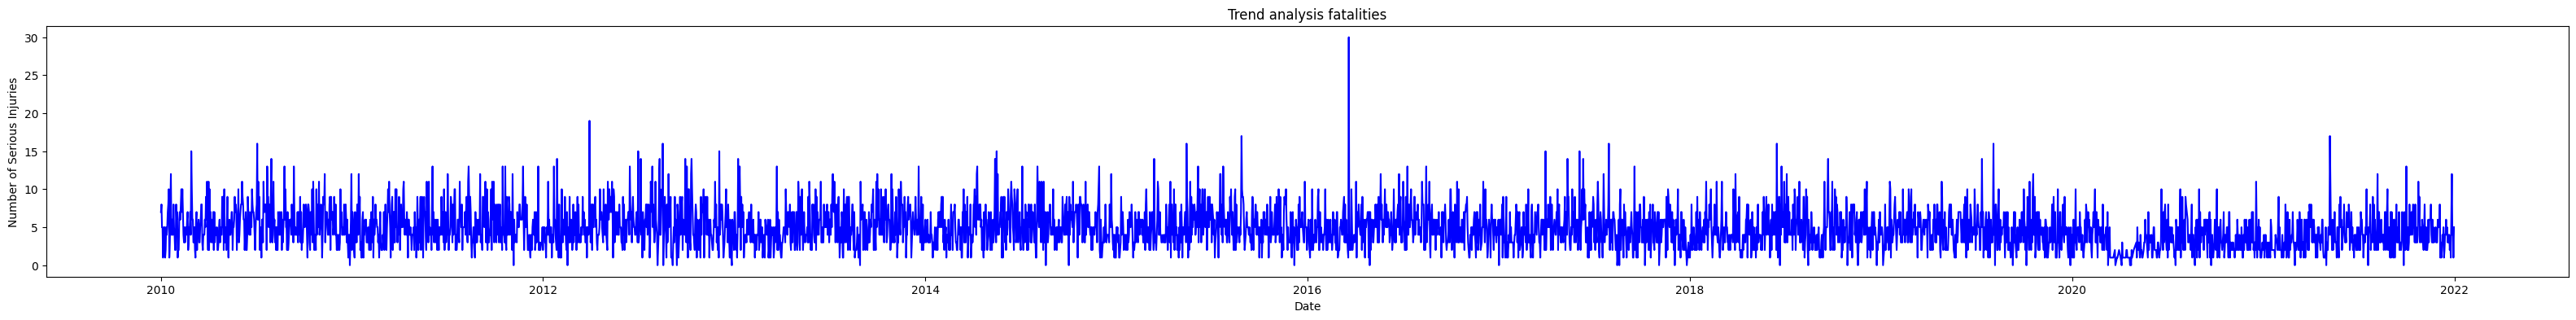

In [75]:
injuries_by_day = df[['Date ', 'Serious Injuries ']].groupby('Date ', as_index=False).sum()
injuries_by_day['Date '] = pd.to_datetime(injuries_by_day['Date '], format='%d/%m/%Y')
injuries_by_day = injuries_by_day.sort_values(by='Date ')

plot_time_serie(x=injuries_by_day['Date '], s=injuries_by_day['Serious Injuries '], ylabel='Number of Serious Injuries', title='Trend analysis fatalities')

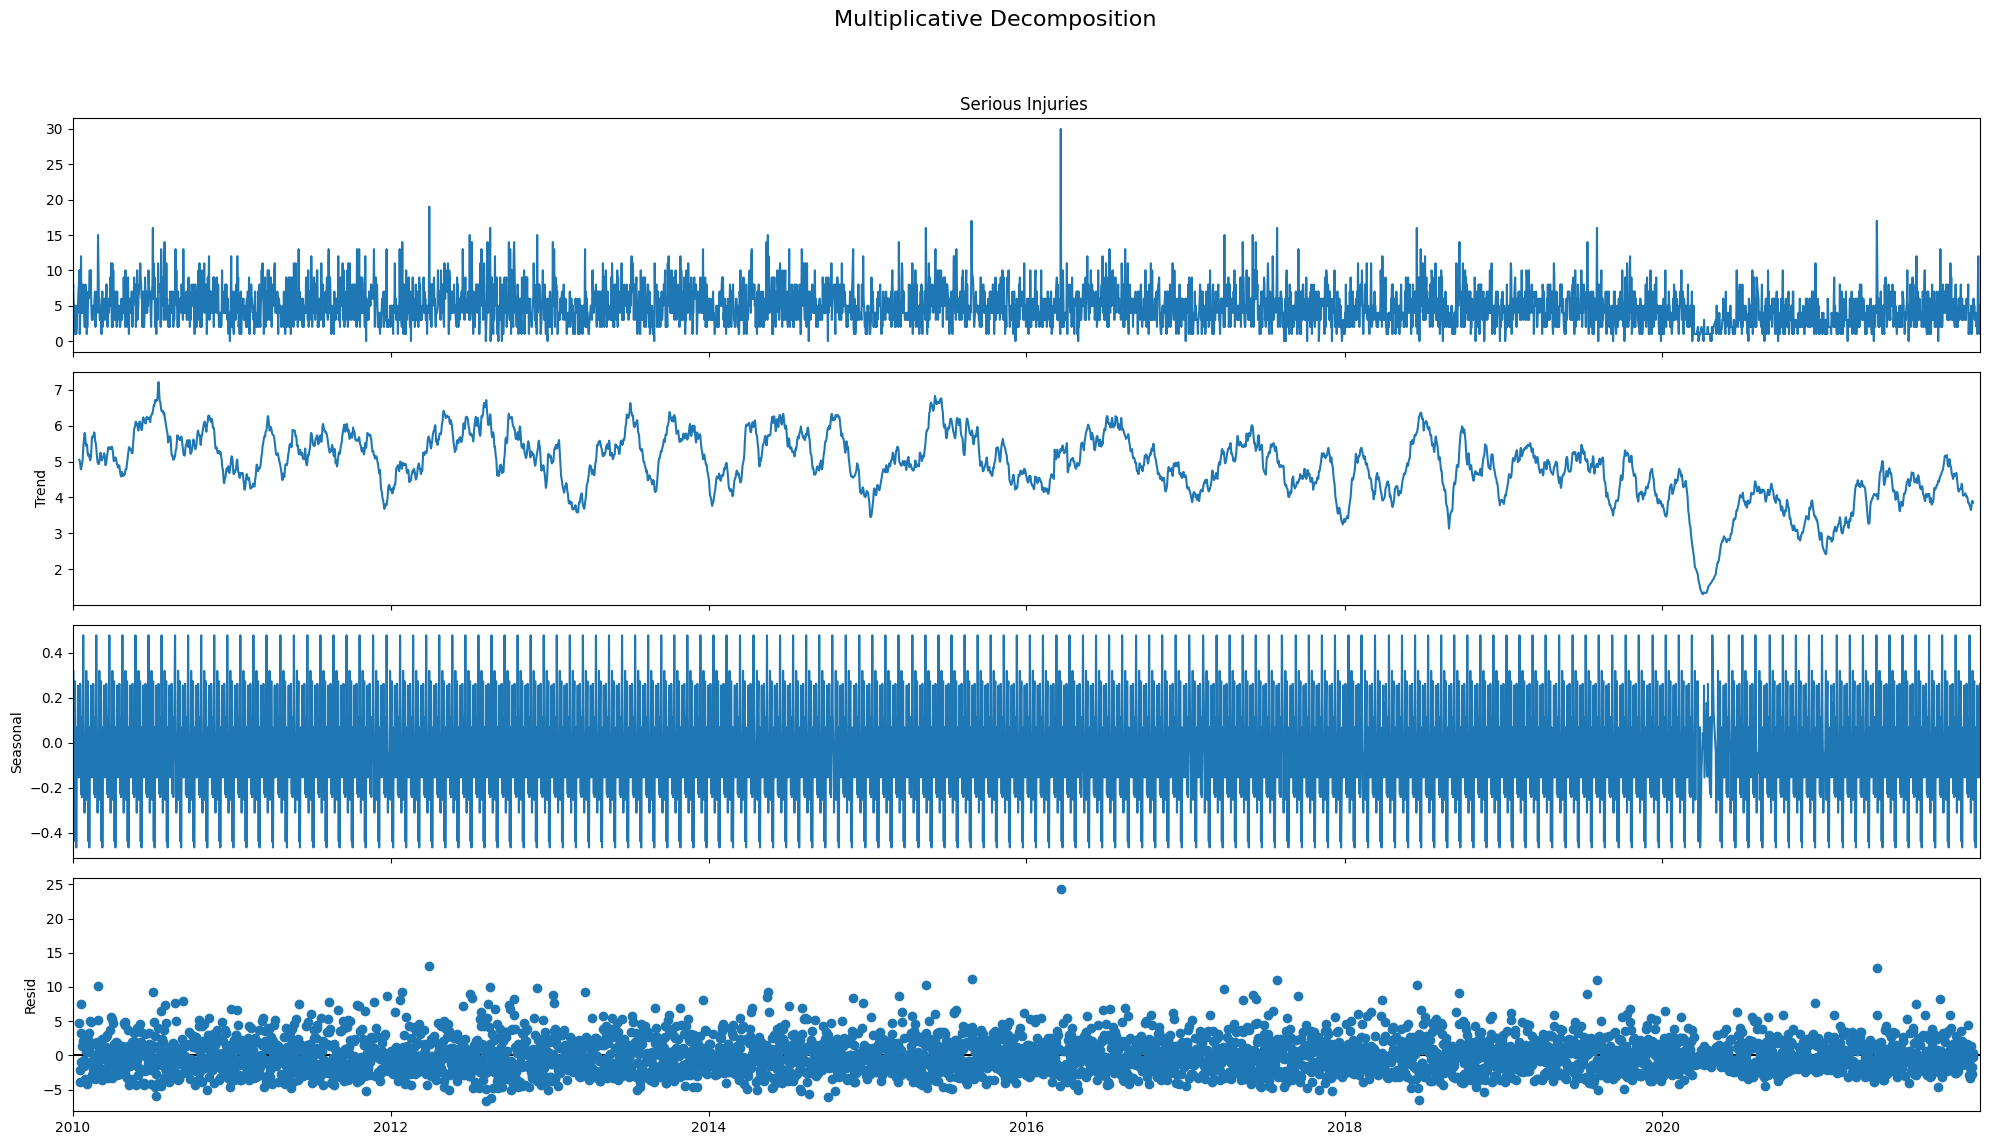

In [76]:
addictive_decomposition = seasonal_decompose(injuries_by_day.set_index('Date ')['Serious Injuries '], model='addictive', period=30)

plt.rcParams.update({'figure.figsize': (20,12)})
addictive_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Accident Characteristics

#### What common characteristics (time of day, type of road, etc.) are observed in the most severe accidents?

In [78]:
df['Lighting Conditions '].value_counts()

De dia, dia clar                               14626
De nit, il·luminació artificial suficient       2412
De nit, sense llum artificial                   1431
Alba o capvespre                                 993
De nit, il·luminació artificial insuficient      867
De dia, dia fosc                                 826
Sense especificar                                  6
Name: Lighting Conditions , dtype: int64

In [80]:
df['Weather Conditions '].value_counts()

Bon temps            20003
Pluja dèbil            883
Pluja forta            250
Nevant                  11
Calamarsa               10
Sense especificar        4
Name: Weather Conditions , dtype: int64

In [107]:
df.groupby(['Type of Road']).size()

Type of Road
Altres                                               579
Autopista                                            221
Autovia                                              491
Camí rural/pista forestal                            175
Carretera convencional                              9019
Via urbana( inclou carrer i carrer residencial)    10676
dtype: int64

<AxesSubplot: xlabel='Type of Road'>

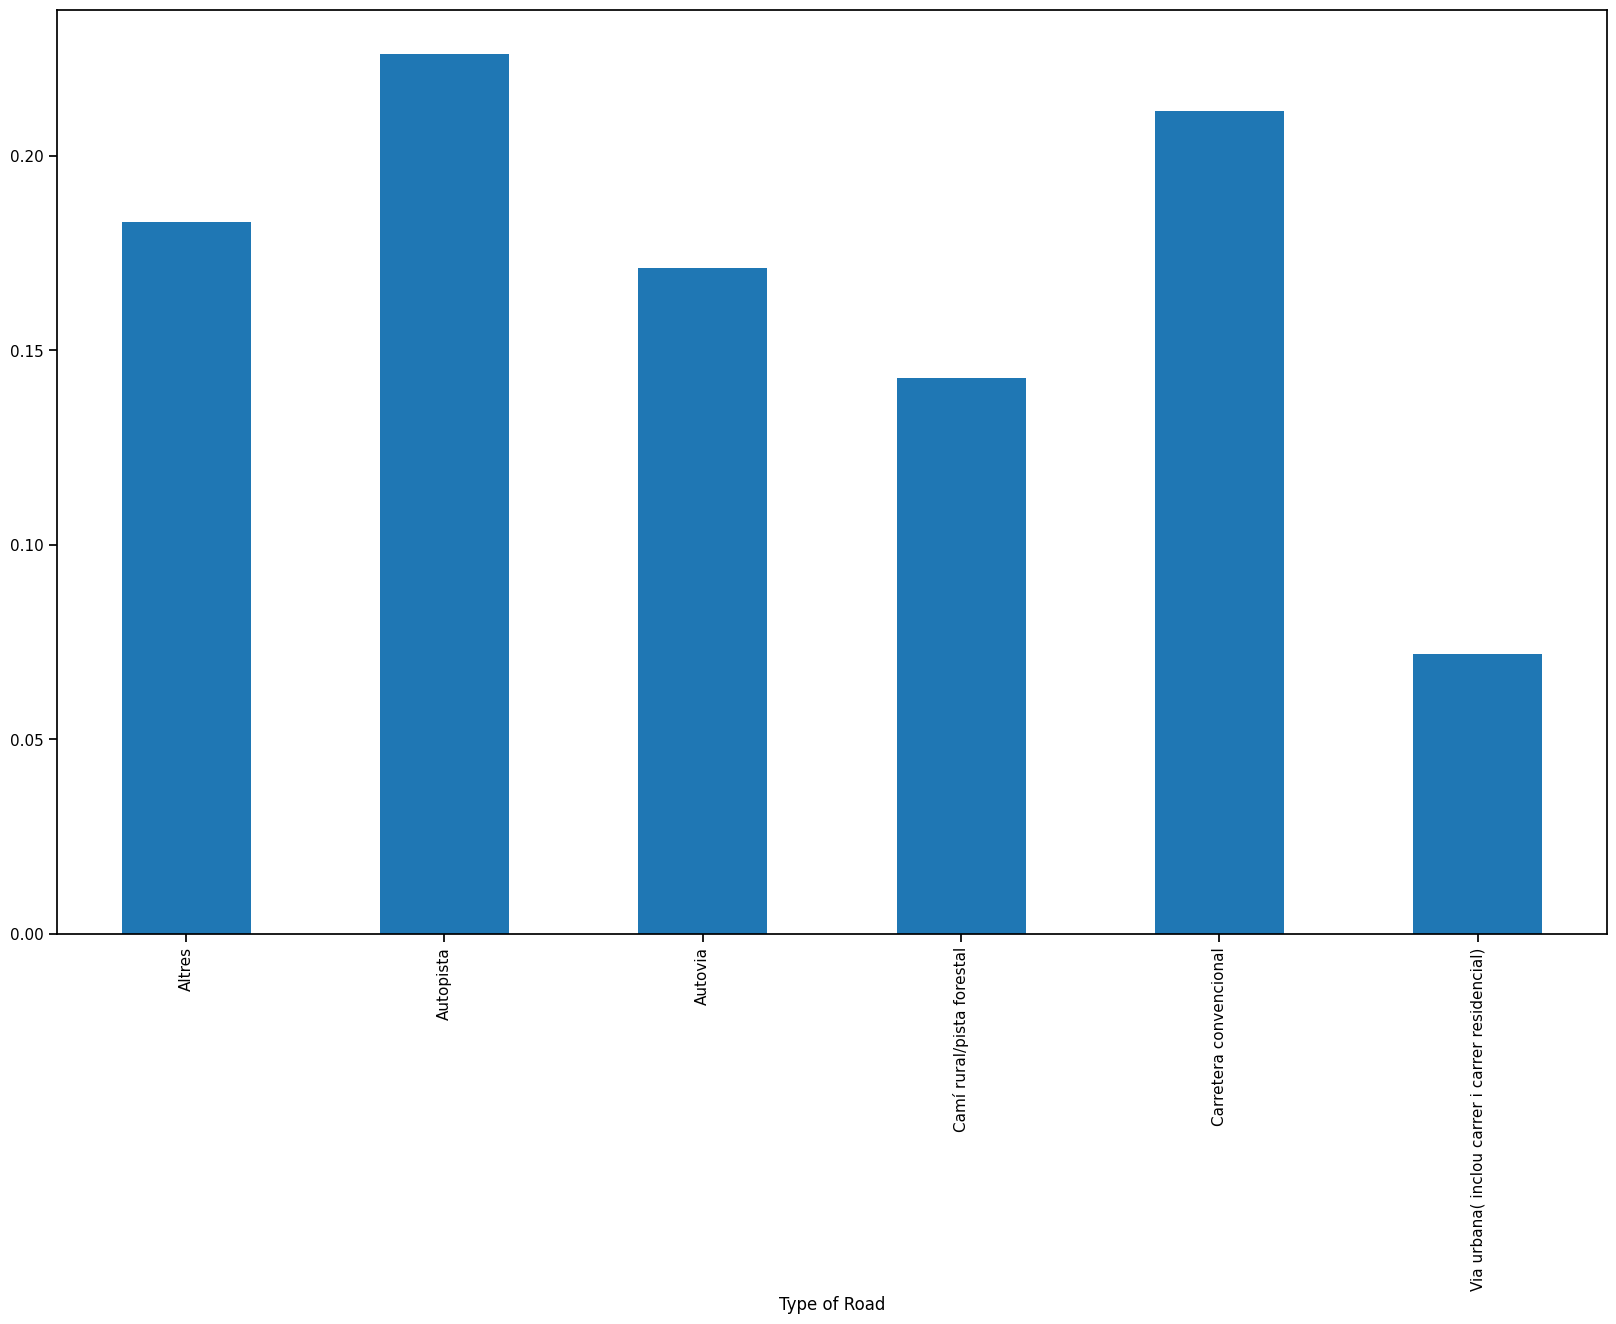

In [532]:
(df.groupby(['Type of Road'])['Fatalties'].sum() / df.groupby(['Type of Road']).size()).plot(kind='bar')

In [83]:
df['Day of the Week Grouping '].value_counts()

Feiners         13441
CapDeSetmana     7720
Name: Day of the Week Grouping , dtype: int64

In [87]:
df['Time of Day Grouping '].value_counts()

Tarda    9935
Matí     8661
Nit      2565
Name: Time of Day Grouping , dtype: int64

In [88]:
df['Type of Accident '].value_counts()

Col.lisió de vehicles en marxa                             9467
Atropellament                                              4566
Sortida de la calcada sense especificar                    2813
Bolcada a la calcada                                       2016
Col.lisió d'un vehicle contra un obstacle de la calcada    1204
Altres                                                     1095
Name: Type of Accident , dtype: int64

### Geographical Insights

#### Which municipalities or counties in Catalonia have the highest incidence of traffic accidents? How does this correlate with population density or road network characteristics?

In [109]:
df.groupby('Municipality Name ').size()

Municipality Name 
ABELLA DE LA CONCA     3
ABRERA                25
AGER                   7
AGRAMUNT              10
AGUILAR DE SEGARRA    11
                      ..
VINAIXA                9
VINEBRE                2
VINYOLS I ELS ARCS     9
VIVER I SERRATEIX      1
XERTA                 10
Length: 877, dtype: int64

In [118]:
df.groupby('County Name ').size().sort_values(ascending=False)

County Name 
Barcelones           3752
Valles Occidental    2330
Baix Llobregat       1746
Valles Oriental      1159
Maresme              1021
Segria                834
Tarragones            725
Alt Emporda           722
Selva                 721
Bages                 693
Girones               660
Baix Camp             634
Osona                 629
Alt Penedes           499
Garraf                434
Baix Emporda          408
Anoia                 364
Baix Ebre             354
Baix Penedes          345
Noguera               284
Montsia               273
Bergueda              234
Alt Urgell            229
Garrotxa              220
Alt Camp              190
Pla d'Urgell          149
Cerdanya              147
Pla de l'Estany       133
Ribera d'Ebre         131
Segarra               122
Urgell                121
Moianès               119
Solsones              118
Garrigues              99
Conca de Barbera       89
Pallars Jussa          87
Ripolles               84
Pallars Sobira         73

In [ ]:
df_pop = pd.read_csv('./data/t15227202100.csv', sep=',').rename(columns={'Unnamed: 0': 'County Name '})
df_pop

In [ ]:
!pip install unidecode
import unidecode

In [128]:
def remove_accents(a):
    return unidecode.unidecode(a)

df_pop['County Name '] = df_pop['County Name '].apply(remove_accents)

In [177]:
df_pop.at[6, 'County Name '] = "Val d'Aran"

In [179]:
county_acc_density = df.groupby('County Name ').size() / df_pop.set_index('County Name ')['Density (inhabitants/km²)']
county_acc_density

County Name 
Alt Camp                2.270012
Alt Emporda             6.817753
Alt Penedes             2.684239
Alt Pirineu i Aran           NaN
Alt Urgell             16.241135
Alta Ribagorca          3.804348
Anoia                   2.540126
Bages                   4.182257
Baix Camp               2.265095
Baix Ebre               4.509554
Baix Emporda            2.085890
Baix Llobregat          1.018254
Baix Penedes            0.926174
Barcelona                    NaN
Barcelones              0.239746
Bergueda                6.923077
Camp de Tarragona            NaN
Catalonia                    NaN
Cerdanya                4.176136
Comarques Centrals           NaN
Comarques Gironines          NaN
Conca de Barbera        2.880259
Garraf                  0.520758
Garrigues               4.159664
Garrotxa                2.732919
Girona                       NaN
Girones                 1.930389
Lleida                       NaN
Maresme                 0.885286
Metropolita                  N

In [ ]:
!pip install geopandas

In [183]:

import geopandas as gpd
shape=gpd.read_file('./data/shapefiles_catalunya_comarcas/shapefiles_catalunya_comarcas.shp')
shape['County Name '] = shape['nom_comar'].apply(remove_accents)


In [184]:
shape = shape.merge(pd.DataFrame(county_acc_density, columns=['accident_density']).reset_index(),
            how='left',
            on='County Name ')

In [185]:
shape.sort_values(by='accident_density', ascending=False)

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,County Name,accident_density
7,9,4.0,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",Alt Urgell,16.241135
3,5,26.0,25,Pallars Sobirà,1377.92,"POLYGON ((0.96112 42.63141, 0.96103 42.63150, ...",Pallars Sobira,14.038462
30,34,23.0,25,Noguera,1784.15,"POLYGON ((1.09783 42.06142, 1.09799 42.06219, ...",Noguera,12.909091
2,4,25.0,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",Pallars Jussa,8.877551
33,37,35.0,25,Solsonès,1000.47,"MULTIPOLYGON (((1.35842 42.07417, 1.35804 42.0...",Solsones,8.676471
24,28,14.0,08,Berguedà,1185.56,"MULTIPOLYGON (((1.94267 42.30759, 1.94306 42.3...",Bergueda,6.923077
39,3,2.0,17,Alt Empordà,47.85,"MULTIPOLYGON (((2.73112 42.26371, 2.73035 42.2...",Alt Emporda,6.817753
35,39,33.0,25,Segrià,1396.95,"MULTIPOLYGON (((0.57895 41.82497, 0.57930 41.8...",Segria,5.504950
0,1,30.0,43,Ribera d'Ebre,827.44,"POLYGON ((0.49483 41.19657, 0.49420 41.19667, ...",Ribera d'Ebre,4.962121
15,17,24.0,17,Osona,1246.78,"MULTIPOLYGON (((2.01533 42.01705, 2.01613 42.0...",Osona,4.772382


<AxesSubplot: >

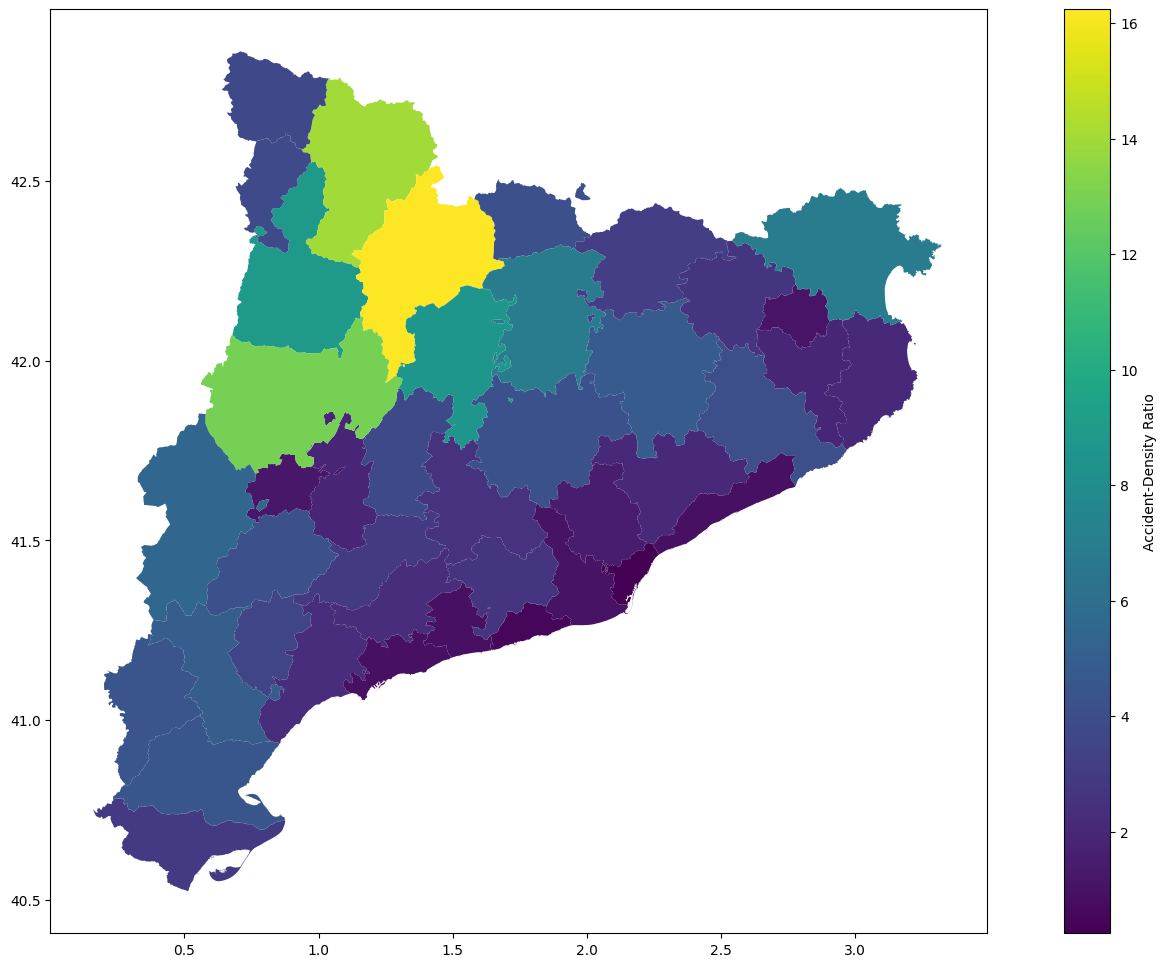

In [186]:
shape.plot(column='accident_density', legend=True, legend_kwds={'label': "Accident-Density Ratio",
                        'orientation': "vertical"})

### Yearly Trends

#### How have traffic accident patterns (frequency, severity) changed yearly from 2010 to 2021?

In [190]:
df.groupby('Year').size()

Year
2010    1984
2011    1868
2012    1950
2013    1902
2014    1912
2015    1901
2016    1793
2017    1719
2018    1745
2019    1732
2020    1208
2021    1447
dtype: int64

<AxesSubplot: xlabel='Year'>

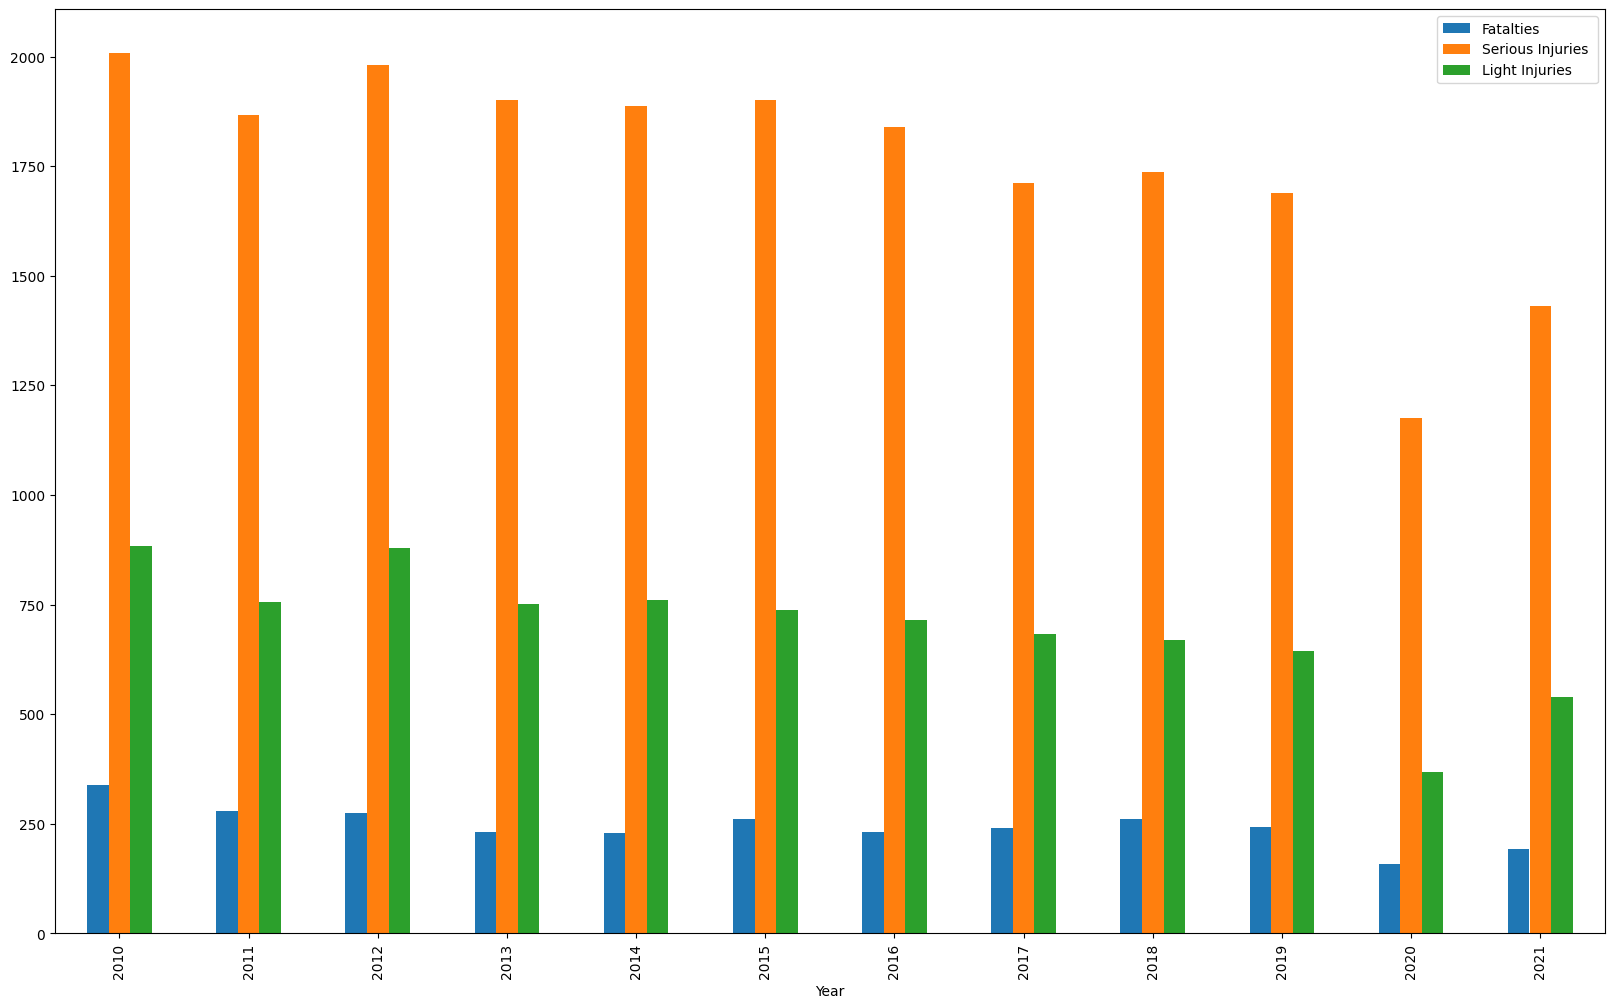

In [197]:
df.groupby('Year').agg({'Fatalties': 'sum',
                        'Serious Injuries ': 'sum',
                        'Light Injuries ': 'sum'}).plot(kind='bar')

### Day and Time Patterns

#### On what days of the week and times of day do most accidents occur? Are there notable differences between weekdays and weekends?

In [ ]:
Day of the Week Grouping		Hour of DayTime of Day Grouping

In [199]:
df['Day of the Week Grouping '].value_counts()

Feiners         13441
CapDeSetmana     7720
Name: Day of the Week Grouping , dtype: int64

C:\Users\giomo\AppData\Local\Temp\ipykernel_16764\1432971767.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.to_datetime(df['Date '])


626

In [223]:
import numpy as np

dates = pd.to_datetime(df['Date '])
time_delta = date.max() - date.min()
n_weeks = int(time_delta / np.timedelta64(1, 'W'))

avg_acc_by_week_moment = df['Day of the Week Grouping '].value_counts() / pd.Series([5 * n_weeks, 2 * n_weeks], index=['Feiners', 'CapDeSetmana'])
avg_acc_by_week_moment

C:\Users\giomo\AppData\Local\Temp\ipykernel_16764\3318122725.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.to_datetime(df['Date '])


Feiners         4.294249
CapDeSetmana    6.166134
dtype: float64

In [201]:
df['Time of Day Grouping '].value_counts()

Tarda    9935
Matí     8661
Nit      2565
Name: Time of Day Grouping , dtype: int64

In [226]:
df.groupby(['Time of Day Grouping ']).agg({'Fatalties': 'sum'})['Fatalties'] / df['Time of Day Grouping '].value_counts()

Matí     0.126660
Nit      0.217544
Tarda    0.129341
dtype: float64

### Environmental Impact

#### How do different weather conditions affect the likelihood of accidents? Is there a correlation between visibility, road conditions, and accident severity?

In [238]:
df_weather = df[['Weather Conditions ', 'Severity of Accident ']]
df_weather

,Weather Conditions,Severity of Accident
0,Bon temps,Accident greu
1,Bon temps,Accident greu
2,Bon temps,Accident mortal
3,Bon temps,Accident greu
4,Bon temps,Accident greu
...,...,...
21156,Bon temps,Accident mortal
21157,Bon temps,Accident greu
21158,Bon temps,Accident greu
21159,Bon temps,Accident greu


In [241]:
df_weather['weater_cond_bool'] = np.where(df_weather['Weather Conditions '] == 'Bon temps', False, True)

C:\Users\giomo\AppData\Local\Temp\ipykernel_16764\408786100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['weater_cond_bool'] = np.where(df_weather['Weather Conditions '] == 'Bon temps', False, True)


In [242]:
df_weather

,Weather Conditions,Severity of Accident,weater_cond_bool
0,Bon temps,Accident greu,False
1,Bon temps,Accident greu,False
2,Bon temps,Accident mortal,False
3,Bon temps,Accident greu,False
4,Bon temps,Accident greu,False
...,...,...,...
21156,Bon temps,Accident mortal,False
21157,Bon temps,Accident greu,False
21158,Bon temps,Accident greu,False
21159,Bon temps,Accident greu,False


In [ ]:
# P(mortale | c.meteo) ? P(mortale e c.meteo) / P(c.meteo)

In [266]:
(df_weather['Severity of Accident '] == 'Accident mortal').sum() / df_weather.shape[0]

0.1263172817919758

In [258]:
p_fatal_and_weather = ((
                        (df_weather['Severity of Accident '] == 'Accident mortal') & 
                        (df_weather['weater_cond_bool'] == True)
                      ).sum() /
                    df_weather.shape[0])
p_weather = (df_weather['weater_cond_bool'] == True).sum() / df_weather.shape[0]

p_fatal_given_weather = p_fatal_and_weather / p_weather
p_fatal_given_weather

0.14680483592400692

In [264]:
conditions = df_weather['Weather Conditions '].drop_duplicates().to_list()

for condition in conditions :
    p_fatal_and_weather = ((
                        (df_weather['Severity of Accident '] == 'Accident mortal') & 
                        (df_weather['Weather Conditions '] == condition)
                      ).sum() /
                    df_weather.shape[0])
    p_weather = (df_weather['Weather Conditions '] == condition).sum() / df_weather.shape[0]

    p_fatal_given_weather = p_fatal_and_weather / p_weather
    print(f"Probability of fatal accident given {condition} weather: {p_fatal_given_weather}")

Probability of fatal accident given Bon temps weather: 0.12513123031545267
Probability of fatal accident given Pluja forta weather: 0.132
Probability of fatal accident given Pluja dèbil weather: 0.15402038505096263
Probability of fatal accident given Nevant weather: 0.09090909090909091
Probability of fatal accident given Sense especificar weather: 0.0
Probability of fatal accident given Calamarsa weather: 0.0


In [269]:
df['Road Surface Conditions '].value_counts()

Sec i net            20078
Mullat                 793
Relliscós              140
Inundat                114
Gelat                   22
Nevat                   10
Sense especificar        4
Name: Road Surface Conditions , dtype: int64

In [270]:
df['Influence of Visibility '].value_counts()

No                   18939
Sense especificar     1447
Si                     775
Name: Influence of Visibility , dtype: int64

In [271]:
df_corr = df[['Influence of Visibility ', 'Road Surface Conditions ', 'Severity of Accident ']]
df_corr

,Influence of Visibility,Road Surface Conditions,Severity of Accident
0,No,Sec i net,Accident greu
1,No,Sec i net,Accident greu
2,No,Sec i net,Accident mortal
3,No,Sec i net,Accident greu
4,No,Sec i net,Accident greu
...,...,...,...
21156,No,Sec i net,Accident mortal
21157,Sense especificar,Sec i net,Accident greu
21158,No,Sec i net,Accident greu
21159,No,Sec i net,Accident greu


In [281]:
df_corr['road_cond_bool'] = np.where(df_corr['Road Surface Conditions '] == 'Sec i net', False, True)

C:\Users\giomo\AppData\Local\Temp\ipykernel_16764\2107518507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['road_cond_bool'] = np.where(df_corr['Road Surface Conditions '] == 'Sec i net', False, True)


In [ ]:
df_corr['visibility_bool'] = np.where(df_corr['Influence of Visibility '] == 'No', False, True)

In [280]:
df_visib = df_corr[df_corr['Influence of Visibility '] != 'Sense especificar']
p_fatal_and_visibility = ((
                        (df_visib['Severity of Accident '] == 'Accident mortal') & 
                        (df_visib['visibility_bool'] == True)
                      ).sum() /
                    df_visib.shape[0])
p_visibility = (df_visib['visibility_bool'] == True).sum() / df_visib.shape[0]

p_fatal_given_visibility = p_fatal_and_visibility / p_visibility
p_fatal_given_visibility

0.15483870967741936

In [282]:
p_fatal_and_road_cond = ((
                        (df_corr['Severity of Accident '] == 'Accident mortal') & 
                        (df_corr['road_cond_bool'] == True)
                      ).sum() /
                    df_corr.shape[0])
p_cond_road = (df_corr['road_cond_bool'] == True).sum() / df_corr.shape[0]

p_fatal_given_cond_road = p_fatal_and_road_cond / p_cond_road
p_fatal_given_cond_road

0.12742382271468145

### Road and Traffic Features

#### What impact do road features (such as speed limits and road types) and traffic density have on the occurrence of accidents?

In [ ]:
Type of Road
Road Speed Limit
Area
Subzone within Area

In [287]:
df[['Type of Road', 'Road Speed Limit', 'Area', 'Subzone within Area']]

,Type of Road,Road Speed Limit,Area,Subzone within Area
0,Via urbana( inclou carrer i carrer residencial),100.0,Zona urbana,Zona urbana
1,Carretera convencional,40.0,Carretera,Carretera
2,Carretera convencional,80.0,Carretera,Carretera
3,Via urbana( inclou carrer i carrer residencial),100.0,Zona urbana,Zona urbana
4,Via urbana( inclou carrer i carrer residencial),100.0,Zona urbana,Zona urbana
...,...,...,...,...
21156,Carretera convencional,100.0,Zona urbana,Travessera
21157,Via urbana( inclou carrer i carrer residencial),NaN,Zona urbana,Zona urbana
21158,Carretera convencional,100.0,Carretera,Carretera
21159,Via urbana( inclou carrer i carrer residencial),100.0,Zona urbana,Zona urbana


In [293]:
df[['Type of Road']].value_counts()

Type of Road                                   
Via urbana( inclou carrer i carrer residencial)    10676
Carretera convencional                              9019
Altres                                               579
Autovia                                              491
Autopista                                            221
Camí rural/pista forestal                            175
dtype: int64

In [297]:
speed_limit = df['Road Speed Limit']
speed_limit = speed_limit[speed_limit < 200]

<AxesSubplot: xlabel='Road Speed Limit', ylabel='Count'>

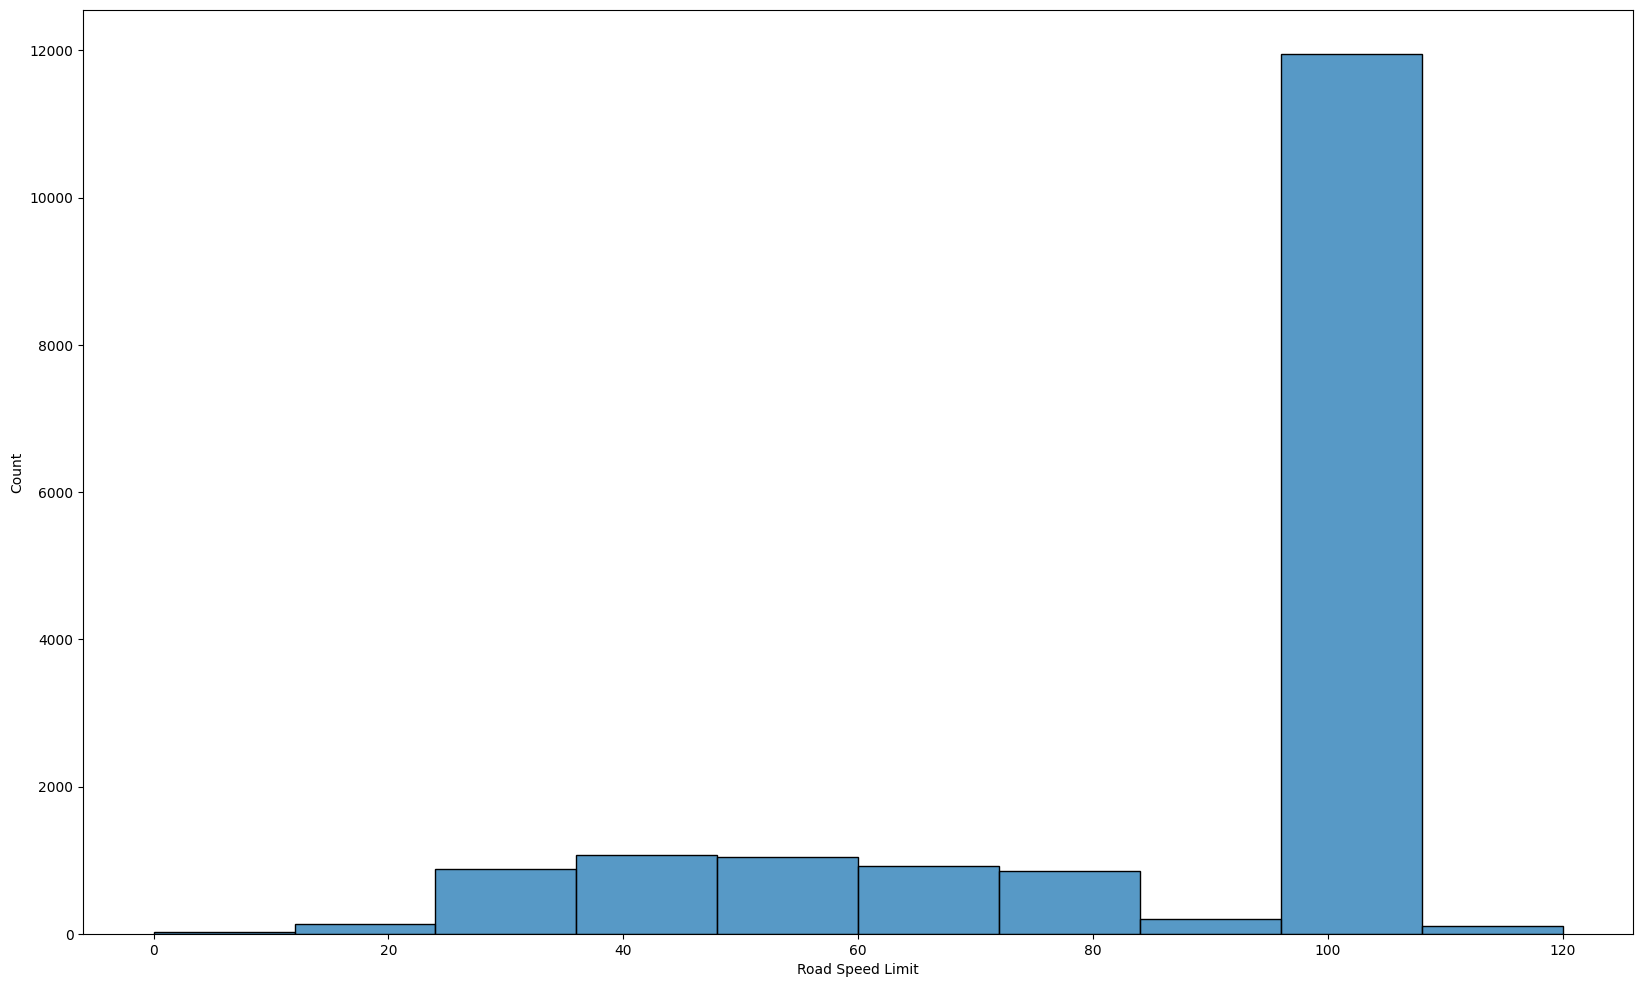

In [299]:
sns.histplot(data=speed_limit, bins=10)

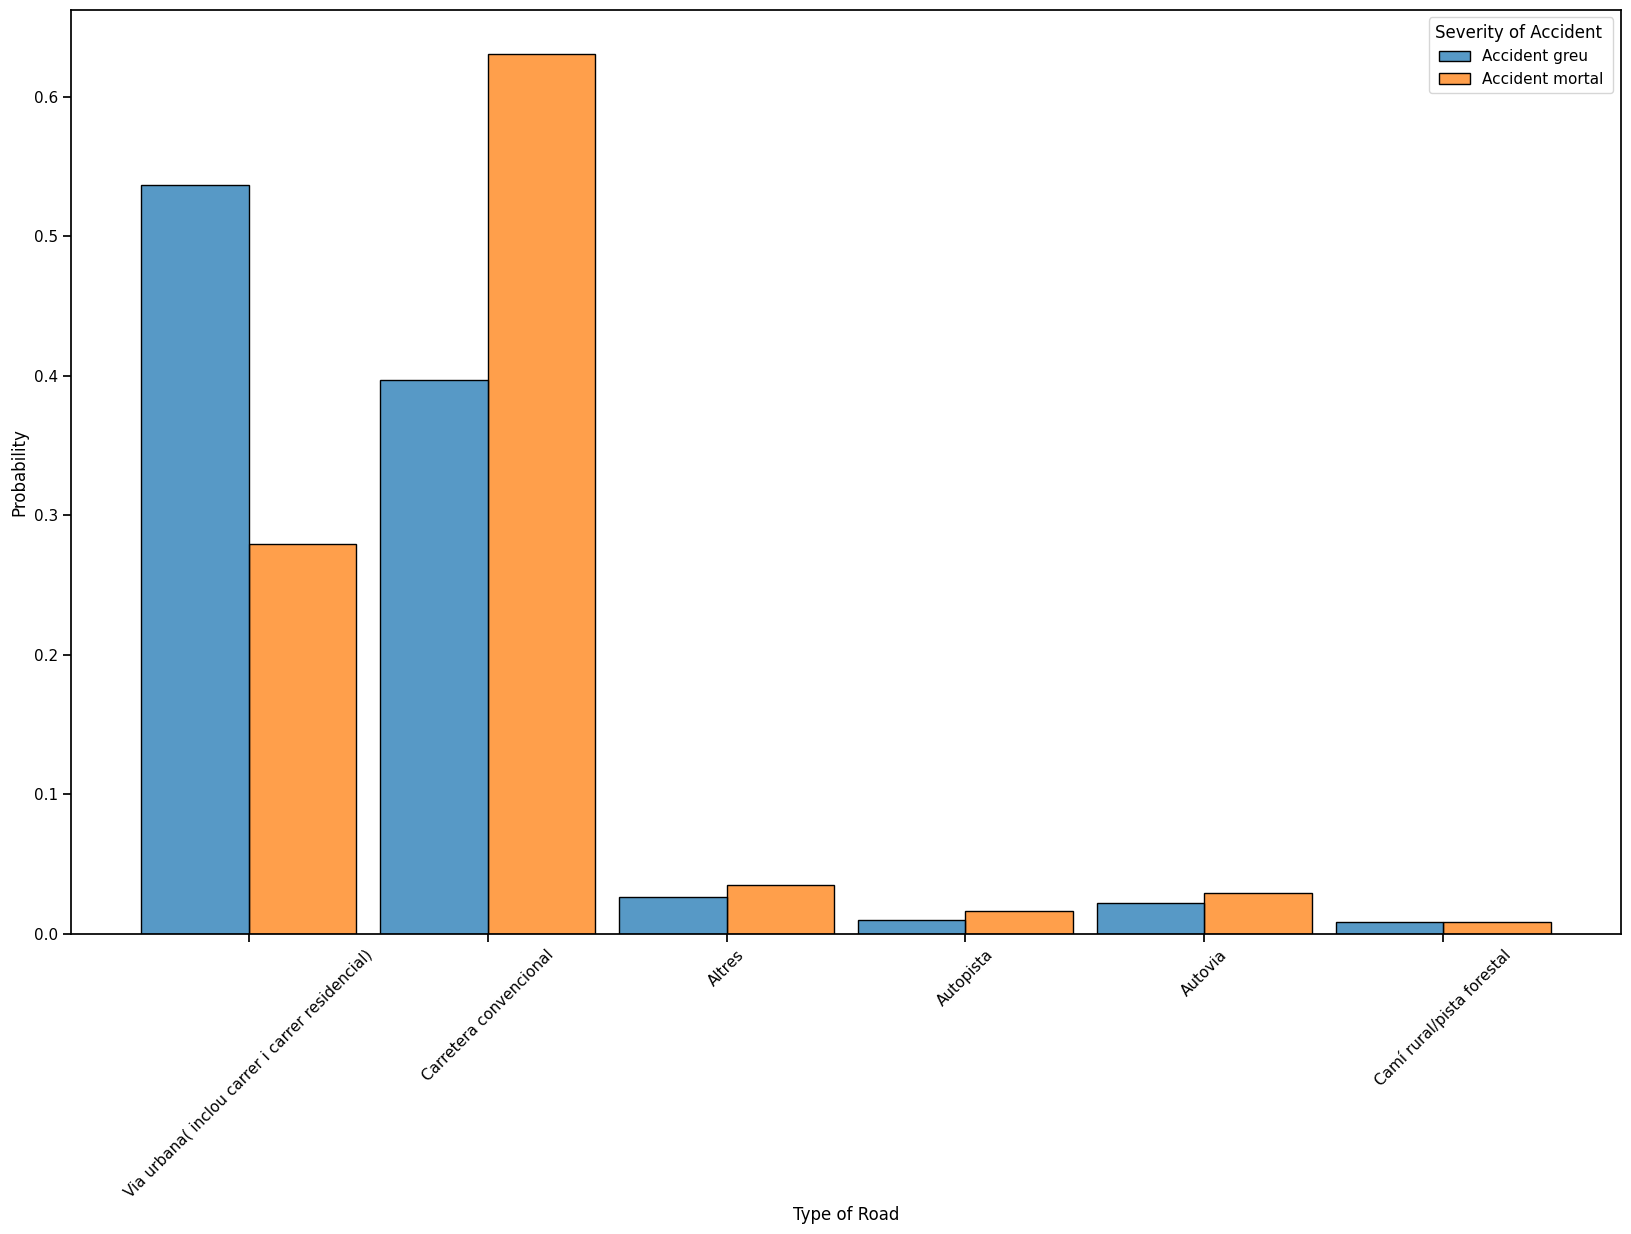

In [319]:
sns.histplot(data=df, x='Type of Road', hue='Severity of Accident ', multiple='dodge', common_norm=False, stat='probability', discrete=True, shrink=.9)
plt.xticks(rotation=45)
plt.show()

### Temporal Clustering

#### Are there specific periods (months, years) where accident patterns cluster significantly? What might be the causes for these clusters?

In [325]:
df['date'] = pd.to_datetime(df['Date '])

C:\Users\giomo\AppData\Local\Temp\ipykernel_16764\3441741558.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['Date '])


In [331]:
ts = df.groupby(pd.Grouper(key='date', freq='M')).size()

(array([14641., 14669., 14700., 14730., 14761., 14791., 14822., 14853.,
        14883., 14914., 14944., 14975., 15006., 15034., 15065., 15095.,
        15126., 15156., 15187., 15218., 15248., 15279., 15309., 15340.,
        15371., 15400., 15431., 15461., 15492., 15522., 15553., 15584.,
        15614., 15645., 15675., 15706., 15737., 15765., 15796., 15826.,
        15857., 15887., 15918., 15949., 15979., 16010., 16040., 16071.,
        16102., 16130., 16161., 16191., 16222., 16252., 16283., 16314.,
        16344., 16375., 16405., 16436., 16467., 16495., 16526., 16556.,
        16587., 16617., 16648., 16679., 16709., 16740., 16770., 16801.,
        16832., 16861., 16892., 16922., 16953., 16983., 17014., 17045.,
        17075., 17106., 17136., 17167., 17198., 17226., 17257., 17287.,
        17318., 17348., 17379., 17410., 17440., 17471., 17501., 17532.,
        17563., 17591., 17622., 17652., 17683., 17713., 17744., 17775.,
        17805., 17836., 17866., 17897., 17928., 17956., 17987., 

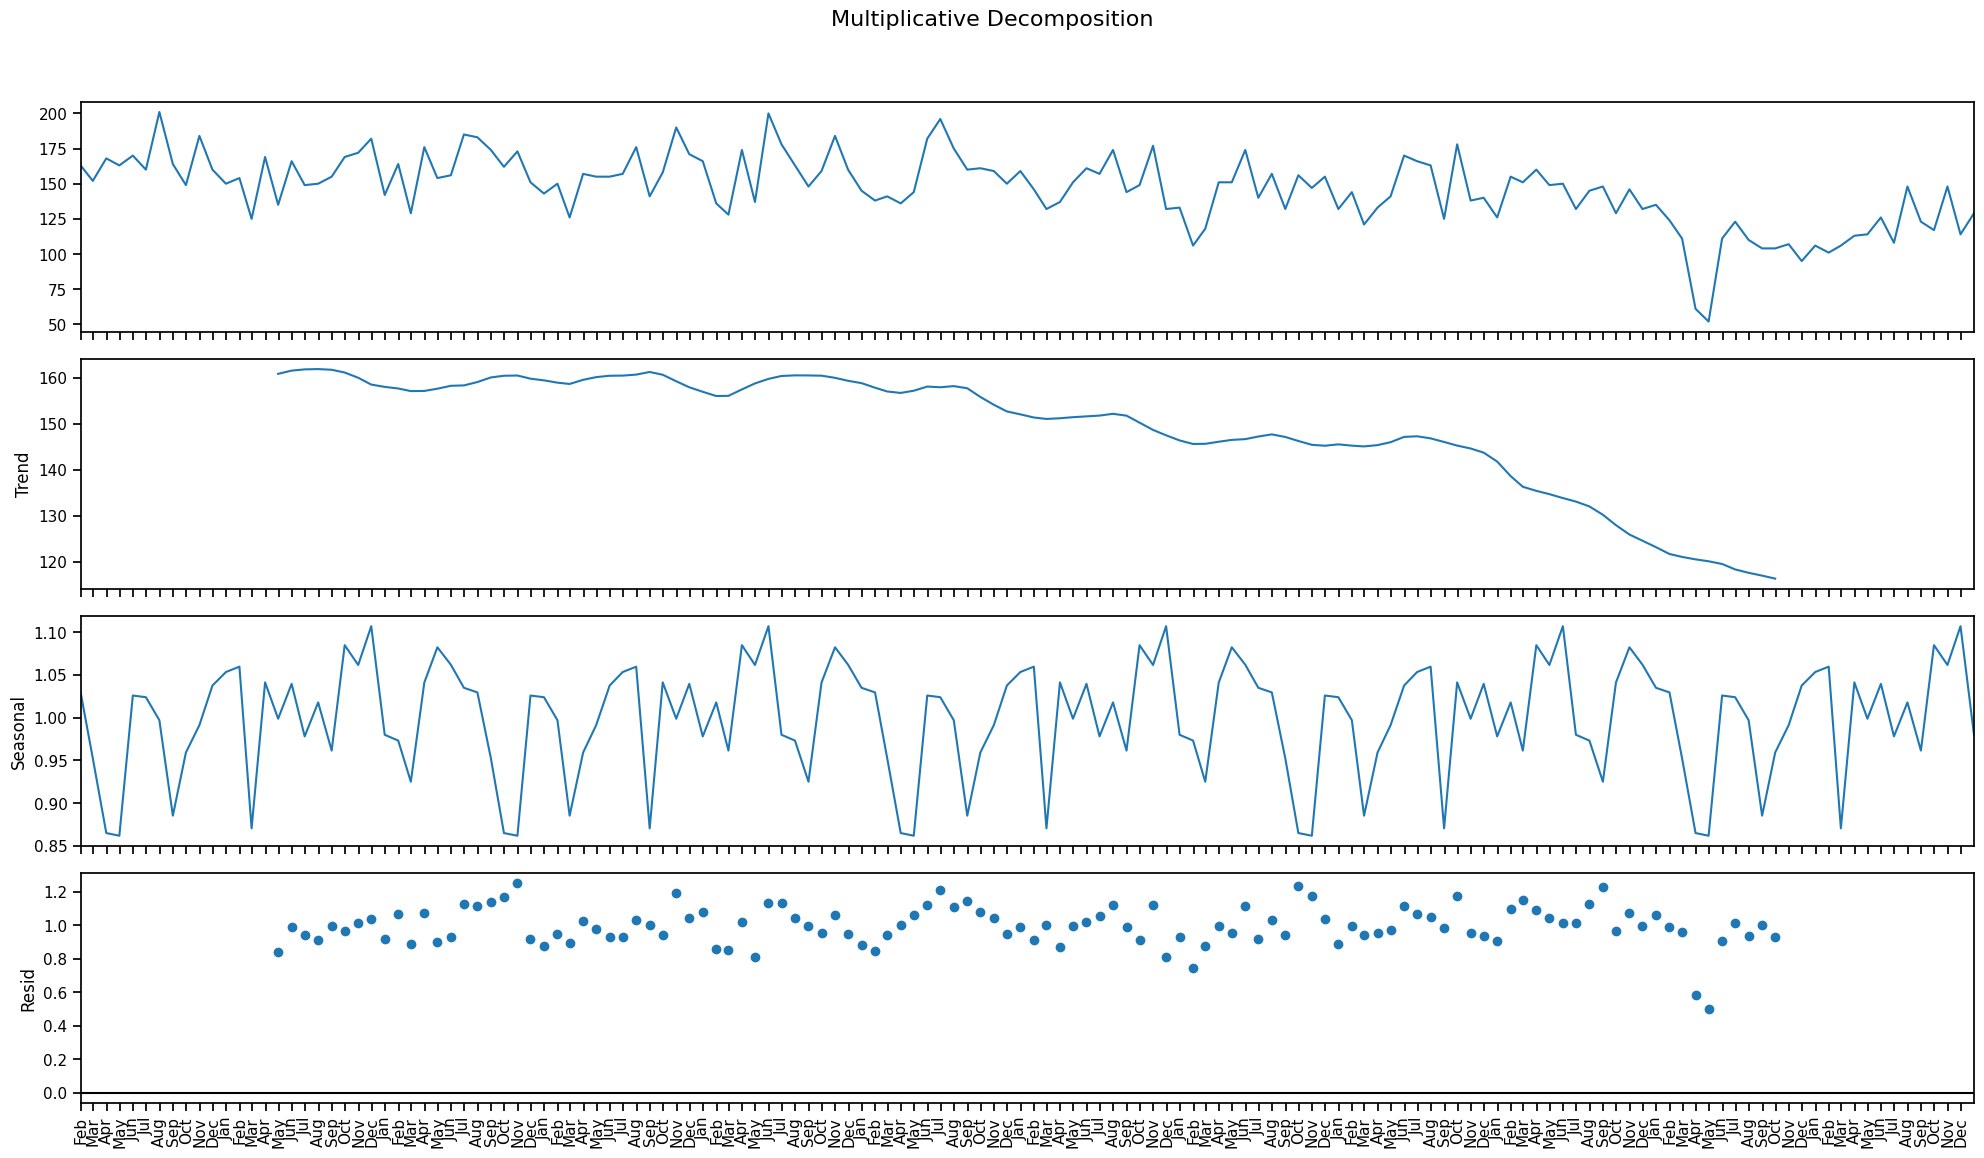

In [338]:
import matplotlib.dates as mdates



multiplicative_decomposition = seasonal_decompose(ts, model='multiplicative', period=30)
plt.rcParams.update({'figure.figsize': (20,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)

### Time-Series Forecasting

#### 

Based on past trends, create a model to forecast the number of accidents, fatalities, or serious injuries for the upcoming year.

Clearly describe the forecasting model you have developed. This should include the type of model, its structure, and any specific features or techniques it utilizes. Discuss the factors that influenced your decision, such as the model’s accuracy, efficiency, suitability to the data characteristics, or its ability to handle the complexities of the dataset.

### Model selection: 

For this task it has been chosen the Arima model. This model has different benefit among which:

Trends and Stationarity: The ARIMA model is particularly useful when the time series exhibits trends and is non-stationary over time. By incorporating autoregressive and moving average components, it can model these temporal variations and predict future changes effectively.

Stochastic Component: Time series often contain a stochastic component that can be effectively modeled using ARIMA. This model can capture random variation and provide forecasts that account for this variability.

Flexibility: ARIMA can handle a wide range of behaviors in time series, including linear and non-linear trends, seasonality, and short-term fluctuations. It can adapt to complex patterns with various features.

Adaptability: ARIMA can be fitted to time series with different frequency intervals and can be extended to model series with seasonality or cyclicality by adding seasonal components (SARIMA).

Forecast Validity: By employing diagnostic and validation techniques, the adequacy of the ARIMA model and the validity of forecasts can be evaluated. This helps identify any issues with the model and enhance forecast accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

In [506]:
df['date'] = pd.to_datetime(df['Date '])

C:\Users\giomo\AppData\Local\Temp\ipykernel_16764\3441741558.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['Date '])


In [534]:
labels = ['total_accidents',
          'Fatalties',
          'Serious Injuries '
          ]


df_arima = df[['Fatalties', 'Serious Injuries ', 'date']].groupby('date').sum()

df_arima['total_accidents'] = df[['date', 'Fatalties']].groupby('date').size()
df_arima.index = pd.DatetimeIndex(df_arima.index).to_period('M')
df_arima = df_arima.groupby('date').sum()
df_arima

,Fatalties,Serious Injuries,total_accidents
date,,,
2010-01,22,173,163
2010-02,27,154,152
2010-03,33,161,168
2010-04,27,165,163
2010-05,23,163,170
...,...,...,...
2021-08,17,128,123
2021-09,14,117,117
2021-10,19,137,148


In [536]:
for label in labels: 
    print(f'\n\nTARGET VARIABLE: {label}')
    train_data, test_data = train_test_split(df_arima[label], test_size=0.1, shuffle=False)

   
    order = (5, 1, 0)  
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()

    # Effettua le predizioni sul set di test
    start_index = len(train_data)
    end_index = len(train_data) + len(test_data) - 1
    predictions = fitted_model.predict(start=start_index, end=end_index, typ='levels')

    # Valuta le prestazioni del modello
    mse = mean_squared_error(test_data, predictions)
    print("Mean Squared Error:", mse)
    print(f'\n the number of {label} in the next year is: {predictions[-12:].sum()}')



TARGET VARIABLE: total_accidents
Mean Squared Error: 371.00928247290943

 the number of total_accidents in the next year is: 1263.2947738004561


TARGET VARIABLE: Fatalties
Mean Squared Error: 19.446639980853874

 the number of Fatalties in the next year is: 179.073335511392


TARGET VARIABLE: Serious Injuries 
Mean Squared Error: 340.49076238111144

 the number of Serious Injuries  in the next year is: 1248.8228290578704


c:\Users\giomo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\giomo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\giomo\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [527]:
predictions[-12:].sum()

1263.2947738004561